# Teste de hipótese Z

## Breve resumo

- Compara as medidas obtidas de uma amostra com os dados da população
- Vai aferir se o resultado amostral é correto ou não
- Hipótese: ideia a ser testada
- Vai confirmar ou rejeitar uma afirmação

 
- `H0`: hipótese nula
    - Afirmação que já existia
    - Hipótese a ser testada
    - Verdadeira até que se prove o contrário
    
    
- `H1` ou `Ha`: hipótese alternativa
    - Nova hipótese
    - O que está tentando provar
    - Tenta provar que a H0 é falsa
    

- Alpha(α):
    - Probabilidade cometer o erro do tipo I
    - Quanto menor, mais seguro é o resultado
    - Região crítica na distribuição de probabilidade
    - Em geral, 0.01 e 0.05 (margem de erro)


- Nível de significância:
    - Probabilidade máxima aceitável de cometer um erro do tipo I
    - Em geral, 99% e 95%  
    Ex: com 95% de significância, estamos dispostos a aceitar um erro de 5% ao rejeitar a hipótese nula.
    
    
- Valor de p (p-value):  
    - p-value >= α: não rejeita H0 (sem evidências), rejeita H1
    - p-value < α: rejeita H0 (com evidências), aceita H1


- Erros:  
    - Erro do tipo I: H0 é verdadeira, mas foi rejeitada
    - Erro do tipo II: H0 é falsa, mas foi aceita

### Região de aceitação x rejeição

- Fórmula do estimador:
<div style="text-align: center; font-size: 20px;">
    $Zr = \frac{\bar{x} - μ}{\frac{σ}{\sqrt{n}}}$
</div>


onde,

$\bar{x}$ = média da amostra (estimativa da média populacional)

$\mu$ = média populacional (valor verdadeiro da média)

$Z$ = valor crítico associado ao nível de confiança (1 - α)

$\sigma$ = desvio padrão populacional

$n$ = tamanho da amostra



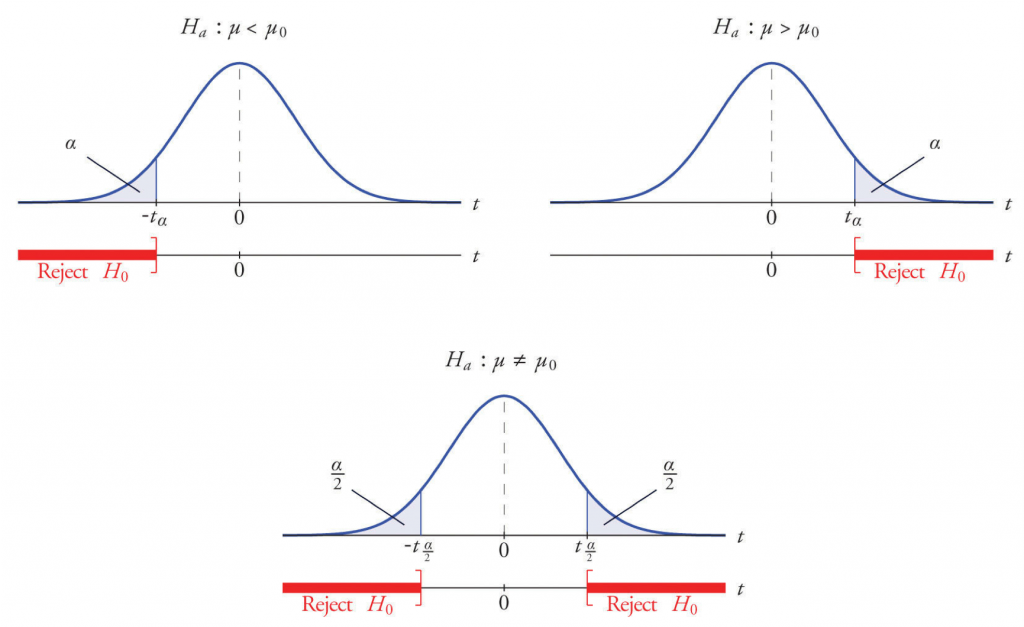

# Bibliotecas

In [1]:
import numpy as np
import math
from scipy.stats import norm


import matplotlib.pyplot as plt
import scienceplots

# Implementação

OBS: Dados originais de altura.

In [2]:
dados_originais = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                            140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                            147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                            150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                            154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                            157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                            161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                            164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                            168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                            171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                            178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

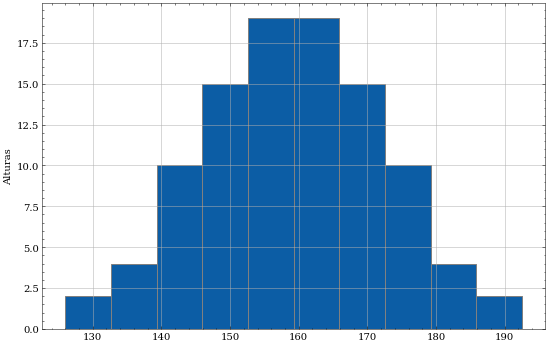

In [3]:
# Checando a distribuição dos dados

plt.rcParams['font.size'] = 15
plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = False

plt.figure(figsize=(9,6))
plt.hist(dados_originais, edgecolor='gray')
plt.ylabel('Alturas')
plt.grid(True)
plt.show();

A hipótese nula (H0) geralmente afirma que não há diferença ou efeito significativo na população, enquanto a hipótese alternativa (H1) afirma que existe uma diferença ou efeito significativo na população. 

# H0 e H1

- H0:

 a média populacional da altura é igual à média original dos dados, ou seja, H0: μ = H0_media.
    

- H1:

 a média populacional da altura é maior que a média original dos dados, ou seja, H1: μ > H0_media.
 
 
 **OBS**: essas hipóteses são formuladas com base na alteração nos dados originais, em que os valores foram multiplicados por 1.03 para formar os "dados_novos". A hipótese alternativa H1 reflete a expectativa de que a média populacional das alturas após a alteração seja maior do que a média original.

In [4]:
H0_media = np.mean(dados_originais)
H0_desviop = np.std(dados_originais)

H0_media, H0_desviop 

(159.25, 13.65)

In [5]:
dados_novos = dados_originais * 1.03

H1_media = np.mean(dados_novos)
H1_desviop = np.std(dados_novos)

H1_media, H1_desviop

(164.0275, 14.0595)

In [6]:
H1_n = len(dados_novos)
alpha = 0.05

# Achando o Z com o scipy.stats

In [7]:
from scipy.stats import norm

In [8]:
Z = (H1_media - H0_media)/(H1_desviop / math.sqrt(H1_n))
Z

3.398058252427187

In [9]:
# Usar o norm.cdf() no lugar da tabela para achar o valor da probabilidade :D

In [10]:
norm.cdf(3.398058252427187)

0.9996606701617486

In [11]:
# Checando o inverso (achando o valor de Z pela probabilidade)

norm.ppf(0.9996606701617486)

3.3980582524271936

In [12]:
# Aplicando isso à variável

Z = norm.cdf(Z)
Z

0.9996606701617486

# Achando o p-value

In [13]:
p = 1 - Z
p

0.00033932983825135654

# Verificando se há evidências significativas

In [14]:
if p < alpha:
    print('Rejeito a H0')
    
else:
    print('Rejeito H1')

Rejeito a H0


**OBS**: Indica que há evidências significativas para rejeitar a hipótese nula (H0) em favor da hipótese alternativa (H1). Isso sugere que a média populacional da altura, após a alteração nos dados, é estatisticamente maior do que a média original dos dados.

# Teste de hipótese Z com o statsmodels

In [15]:
from statsmodels.stats.weightstats import ztest

Testando se a média populacional da altura usando os dados transformados (dados_novos) é estatisticamente maior do que a média original dos dados (H0_media).

In [16]:
_, p = ztest(dados_novos, value=H1_media - H0_media, alternative='larger')

**OBS**: O "alternative" = 'larger' significa que a média de H1 é > que a de H0, se fosse o contrário, poderia usar o 'smaller'. 

In [17]:
alpha = 0.05
if p < alpha:
    print('Rejeito H0')
else:
    print('Rejeito H1')

Rejeito H0
